# Computational and Statistical Methods for Research 2023-2024
## Shengyuan Cai CID 02468309




.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns

## My dataset.
### This dataset examines the effect of varying magnesium intake on bone density. Within a limited dataset, it explores the threshold above which magnesium intake has a significant effect on bone density.

In [2]:
print('My data set is No.', np.remainder(2468309, 25), ', which is 10845.xlsx')

My data set is No. 9 , which is 10845.xlsx


## Raw File Import

In [3]:

df = pd.read_excel('/Users/sonmjack/Downloads/Cosyne/Dataset_10845.xlsx')

display(df)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,* Does a magnesium intake over 350 mg increase...,NaN,NaN
1,NaN,Patient,Magnesium intake (mg),Bone density (g/cm^2)
2,NaN,1,342,0.81
3,NaN,2,352,0.74
4,NaN,3,347,0.77
5,NaN,4,362,0.69
6,NaN,5,367,0.61
7,NaN,6,347,0.79
8,NaN,7,347,0.74
9,NaN,8,377,0.8


#### The current study shows that increasing magnesium intake is positively correlated with BMD, which can increase the production of osteocalcin and 1,25-(OH)2D, promote bone formation, inhibit bone resorption, and reduce the effect of bone conversion. However, a different view exists. An in vitro experiment confirmed that high extracellular magnesium ion concentration could inhibit the spontaneous release of ATP and inactivate the purinergic receptor by regulating calcium oscillations, thus reducing the mineralization of mesenchymal stem cells (hBMSCs) in the extracellular matrix. Another in vitro experiment also found that high extracellular magnesium ion concentration inhibited the differentiation of osteoblasts and the process of extracellular matrix mineralization.

### Based on the above previous studies, and the limited data in the database, this coursework explores the correlation and significance study of whether magnesium intake affect bone density.

In [4]:
#Create a list of raw data to filter
sample1=[]
data1 =[]
sample2=[]
sample_all = []
data2 =[]
label = []
data_all = []
ID =[]
#Classify the original data according to the threshold to create two subsamples
for i in df.iloc[2:32, 1]:
    if df.iloc[i + 1, 2] <= 350:
        sample1.append(df.iloc[i + 1, 2])
        data1.append(df.iloc[i + 1, 3])
        label.append('MI(Magnesium intake) under 350')
        ID.append('patient')
    else:
        sample2.append(df.iloc[i + 1, 2])
        data2.append(df.iloc[i + 1, 3])
        label.append('MI(Magnesium intake) over 350')
        ID.append('patient')
    #Re-combining samples for easy retrieval
    data_all.append(df.iloc[i + 1, 3])
    sample_all.append(df.iloc[i + 1, 2])

In [5]:
#Dataset of magnesium intake < 350mg
df_under = pd.DataFrame()
df_under['MI(Magnesium intake) under 350'] = pd.Series(sample1)
df_under['Bone density (g/cm^2) under 350'] = pd.Series(data1)
#Dataset with magnesium intake > 350mg
df_above = pd.DataFrame()
df_above['MI(Magnesium intake) over 350'] = pd.Series(sample2)
df_above['Bone density (g/cm^2) over 350'] = pd.Series(data2)

In [6]:
display(df_under)

,MI(Magnesium intake) under 350,Bone density (g/cm^2) under 350
0,342,0.81
1,347,0.77
2,347,0.79
3,347,0.74
4,312,0.83
5,297,0.56
6,317,0.67
7,312,0.69
8,322,0.72
9,288,0.68


In [7]:
display(df_above)

,MI(Magnesium intake) over 350,Bone density (g/cm^2) over 350
0,352,0.74
1,362,0.69
2,367,0.61
3,377,0.80
4,367,0.82
5,357,0.67
6,397,0.87
7,392,0.76
8,372,0.71
9,407,0.78


### First observe the distribution of the independent variables of the original data after splitting into two groups. It is found that the sampling is not uniform but random within a group.

/var/folders/jz/rt8774f93qn00g88dj6zpmn40000gn/T/ipykernel_51448/3753556737.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


<Axes: ylabel='Count'>

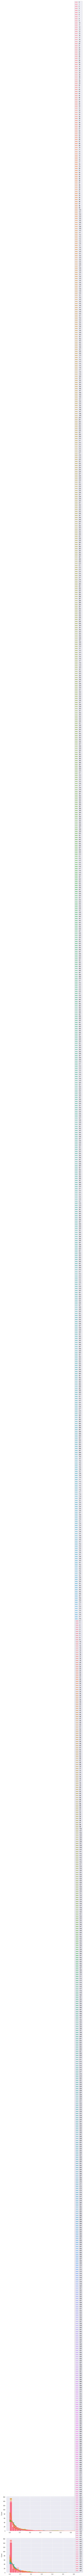

In [5]:
import scipy.io
import numpy as np

neu_data = scipy.io.loadmat('/Users/sonmjack/Downloads/Shuhan_new/neural_data_correcttrials.mat')
be_data = scipy.io.loadmat('/Users/sonmjack/Downloads/Shuhan_new/positionx_data_correcttrials.mat')

neurons = neu_data['neural_data_correct']
neurons = neurons.T



plt.figure(figsize=(10, 10))
plt.title("Schematic histogram of the distribution of data on the independent variable magnesium intake")
plt.subplot(211)
#MI1 = df_under['MI(Magnesium intake) under 350']


# Plotting histograms

sns.histplot(neurons[:,0:1217], bins=30, alpha=0.6,kde=True)
# Fitting a normal distribution curve using sns built-in parameters
plt.subplot(212)
#MI2 = df_above['MI(Magnesium intake) over 350']
sns.histplot(neurons[:,1218:1676], bins=30, alpha=0.6,kde=True)

### Calculate the basic statistical parameters, which are calculated:：
##### Mean:  x̄ = (Σxi) / n
##### Standard Deviation:  σ = √((Σ(xi - x̄)²) / n-1)
##### Standard Error: SE = σ / √n

Text(0.01, 0.6, 'Standard Error = 0.0167')

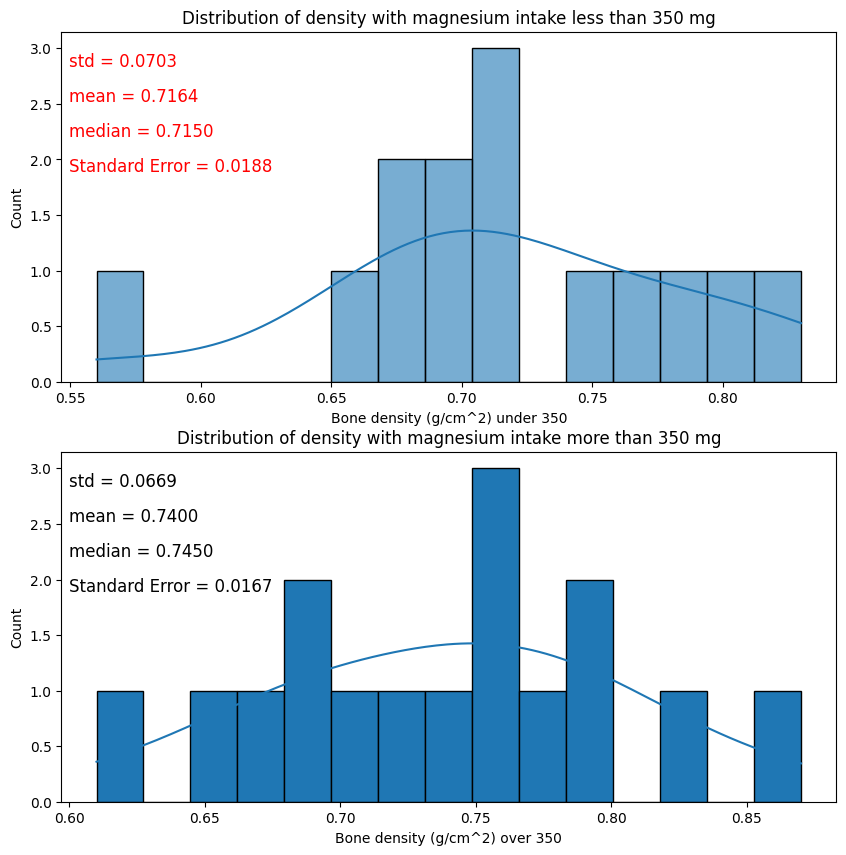

In [9]:
plt.figure(figsize=(10, 10))

#first fig
plt.subplot(211)
plt.title("Distribution of density with magnesium intake less than 350 mg")
D1 = df_under['Bone density (g/cm^2) under 350']
# Plotting histograms
sns.histplot(D1, bins=15, alpha=0.6,kde=True)
# Calculate the standard error
se1 = D1.std() / np.sqrt(len(D1))
# Calculate the mean, median, standard deviation, and standard error and display them on a fig
plt.text(0.01, 0.9, f'std = {D1.std():.4f}', transform=plt.gca().transAxes, fontsize=12, color='r')
plt.text(0.01, 0.8, f'mean = {D1.mean():.4f}', transform=plt.gca().transAxes, fontsize=12, color='r')
plt.text(0.01, 0.7, f'median = {D1.median():.4f}', transform=plt.gca().transAxes, fontsize=12,color='r')
plt.text(0.01, 0.6, f'Standard Error = {se1:.4f}', transform=plt.gca().transAxes, fontsize=12,color='r')

#second fig
plt.subplot(212)
plt.title("Distribution of density with magnesium intake more than 350 mg")
D2 = df_above['Bone density (g/cm^2) over 350']
sns.histplot(D2, bins=15, alpha=1,kde=True)

# Calculate the standard error
se2 = D2.std() / np.sqrt(len(D2))
# Calculate the mean, median, standard deviation, and standard error and display them on a fig
plt.text(0.01, 0.9, f'std = {D2.std():.4f}', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.01, 0.8, f'mean = {D2.mean():.4f}', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.01, 0.7, f'median = {D2.median():.4f}', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.01, 0.6, f'Standard Error = {se2:.4f}', transform=plt.gca().transAxes, fontsize=12)


### Preliminary analysis of statistical results
It was found that the magnesium intake at the threshold based on whether or not the intake was greater than 350 was not statistically significant and required further analysis.
#### A two-sample t-test based on variances differing from each other is performed here first: 
$$
t = \frac{{\bar{x}_1 - \bar{x}_2}}{{\sqrt{\frac{{s_1^2}}{{n_1}} + \frac{{s_2^2}}{{n_2}}}}}
$$

Where, $t$ represents the t-statistic, $\bar{x}_1$ and $\bar{x}_2$ are the means of the two samples, $s_1^2$ and $s_2^2$ are the variances of the two samples, and $n_1$ and $n_2$ are the sample sizes of the two groups.

In [10]:
# Construct a dataset and label the data according to the size of the intake and threshold.
data = {
    "MI(Magnesium intake)": sample_all,
    "Bone density (g/cm^2)": data_all,
    "class": label
}

df_o= pd.DataFrame(data)
df_o['ID'] = pd.Series(ID)

Text(0.4, 0.95, 'p_value = 0.3573')

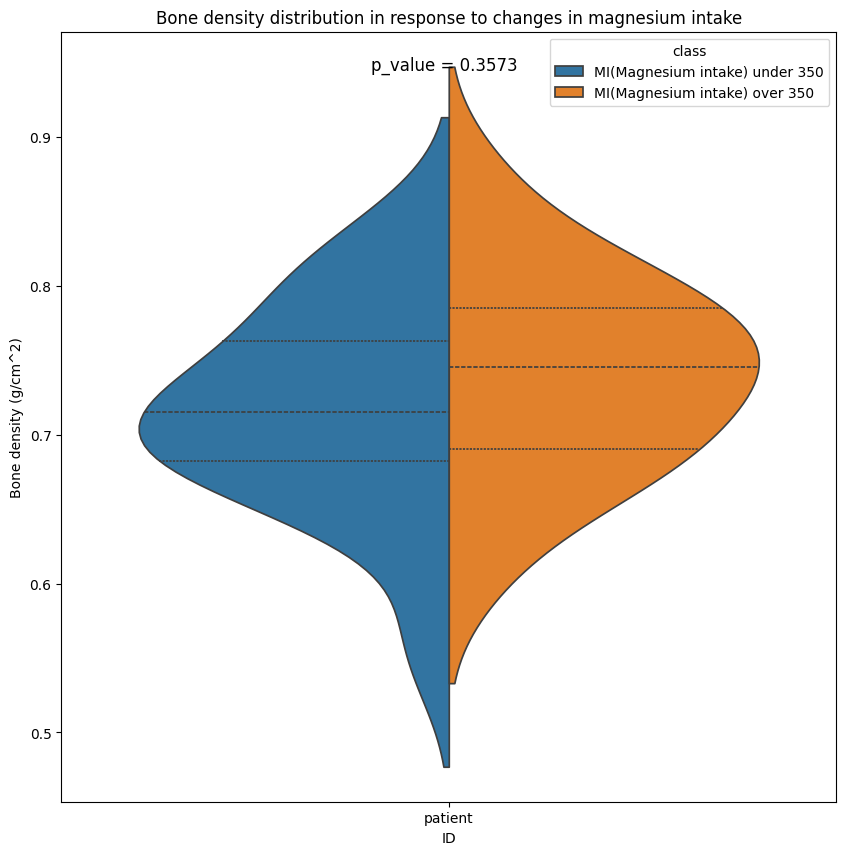

In [11]:
D1 = df_under['Bone density (g/cm^2) under 350']
D2 = df_above['Bone density (g/cm^2) over 350']
plt.figure(figsize=(10, 10))
plt.title("Bone density distribution in response to changes in magnesium intake")
sns.violinplot(data=df_o, x="ID", y="Bone density (g/cm^2)", hue="class", split=True, inner="quart")

#Because the variances of the two samples were not the same, 
#a two-sample t-test was calculated to verify the significance of the difference
t,p = stats.ttest_ind(D1,D2,equal_var=False)
#Display the results of the calculation on the fig
plt.text(0.4, 0.95, f'p_value = {p:.4f}', transform=plt.gca().transAxes, fontsize=12)

### Results of two-sample t-test：
The results showed that under the calculation of hypothesis testing, both the results of the violin plots and the p-value of the test to ($0.3573 〉 0.05$) indicate that magnesium intake greater than 350mg compared to less than 350mg does not significantly increase bone mineral density.

### Use another library to fit a normal distribution curve based on the normal distribution assumption

In order to test the statistical conclusions of the results under the assumption of normal distribution, it was found that a two-sample t-test would be incorrect if the original two data did not conform to a normal distribution. So the fitted mean and variance were observed to be the same through the assumption of normality. If they are not the same, then a closer analysis is needed.

Text(0.1, 0.8, 'mean = 0.7400')

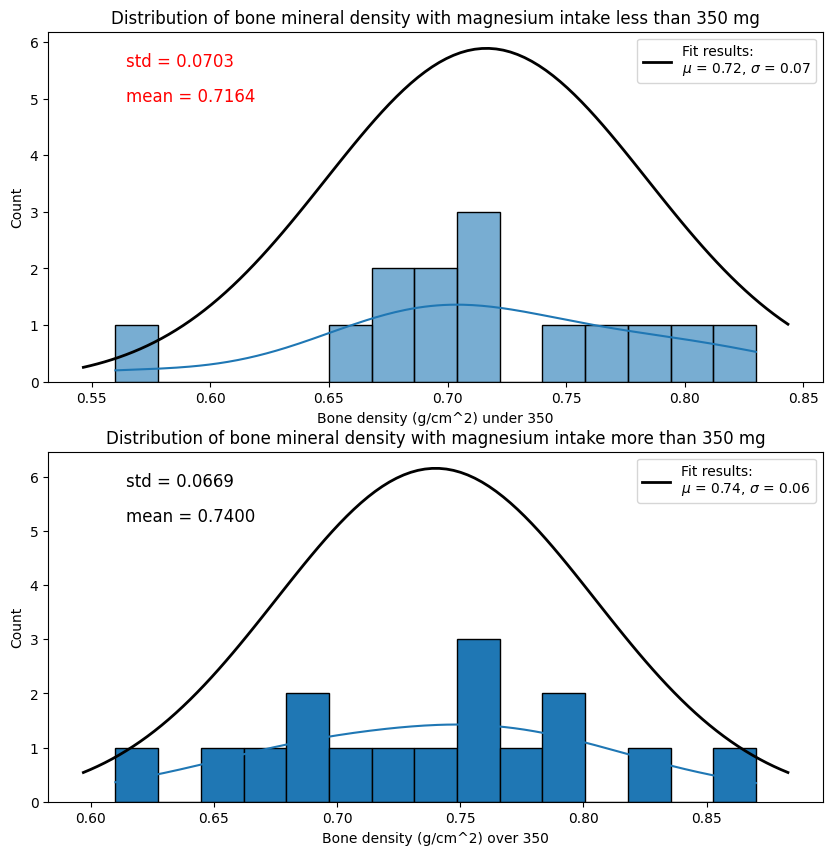

In [12]:
plt.figure(figsize=(10, 10))

#first figire
plt.subplot(211)
plt.title("Distribution of bone mineral density with magnesium intake less than 350 mg")
D1 = df_under['Bone density (g/cm^2) under 350']
# Plotting histograms
sns.histplot(D1, bins=15, alpha=0.6,kde=True)
# Fitting a normal distribution curve
mu, std = stats.norm.fit(D1)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Fit results:\n$\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(mu, std))
# Add Legend
plt.legend()
# Display the variance value
plt.text(0.1, 0.9, f'std = {D1.std():.4f}', transform=plt.gca().transAxes, fontsize=12, color='r')
plt.text(0.1, 0.8, f'mean = {D1.mean():.4f}', transform=plt.gca().transAxes, fontsize=12, color='r')

#second fig
plt.subplot(212)
plt.title("Distribution of bone mineral density with magnesium intake more than 350 mg")
D2 = df_above['Bone density (g/cm^2) over 350']
sns.histplot(D2, bins=15, alpha=1,kde=True)
# Fitting a normal distribution curve
mu, std = stats.norm.fit(D2)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Fit results:\n$\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(mu, std))
# Add Legend
plt.legend()
# Display the variance value
plt.text(0.1, 0.9, f'std = {D2.std():.4f}', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.1, 0.8, f'mean = {D2.mean():.4f}', transform=plt.gca().transAxes, fontsize=12)


### Fitting curves to the distribution of directly observed data


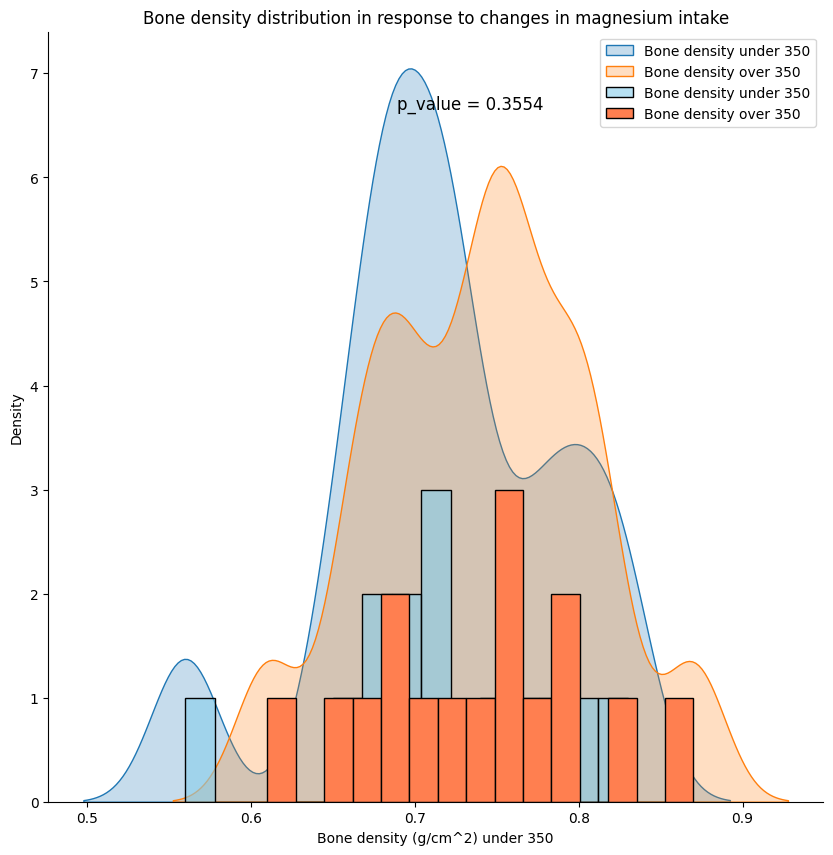

In [13]:
plt.figure(figsize=(10, 10))
plt.title("Bone density distribution in response to changes in magnesium intake")
# Plotting distribution
ax = sns.kdeplot(data=df_under['Bone density (g/cm^2) under 350'],bw_adjust=0.5,label="Bone density under 350",fill=True)
sns.kdeplot(data=df_above['Bone density (g/cm^2) over 350'], bw_adjust=0.5,label="Bone density over 350",fill=True)

D1 = df_under['Bone density (g/cm^2) under 350']
# Plotting histograms
sns.histplot(D1, bins=15, alpha=0.6,label="Bone density under 350",color='skyblue')

D2 = df_above['Bone density (g/cm^2) over 350']
sns.histplot(D2, bins=15, alpha=1,label="Bone density over 350",color='coral')

t,p = stats.ttest_ind(D1,D2)

plt.text(0.45, 0.9, f'p_value = {p:.4f}', transform=plt.gca().transAxes, fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()

## Statistical summary 

### The results of fitting the distribution curves and the distribution curves of the real data show that the data do not conform to the a priori assumption of normal distribution

The parameters obtained from fitting the normal distribution curves of the two data sets are not equal to the standard deviation and mean of the respective real data, indicating that the data do not conform to the a priori assumption of normal distribution. In order to more fully verify this conclusion, I performed shapiro test on the two groups of data separately, so as to verify whether the two groups of data conform to the assumption of normal distribution respectively.

### Verify that the data conforms to a normal distribution using the shapiro test
shapiro test: $$
W = \frac{{\left(\sum_{i=1}^{n} a_ix_{(i)}\right)^2}}{{\sum_{i=1}^{n} (x_i - \bar{x})^2}}
$$

where $a_i$ represents weights related to the sample size $n$, $x_{(i)}$ denotes the $i$
ith ordered observation from the sample, and $\bar{x}$ represents the sample mean.

In [14]:
from scipy.stats import shapiro

def shapiro_test(group):
    stat, p_value = shapiro(group)
    return stat, p_value

# Magnesium intake less than 350mg for normal distribution test
stat,p_value = shapiro_test(D1)
if p_value < 0.05:
    Bool = 'True-Accept'
else:
    Bool = 'False-Refuse'
print(f'MI(Magnesium intake) under 350 ,- p-value: {p_value}',Bool)

# Magnesium intake more than 350mg for normal distribution test
stat,p_value = shapiro_test(D2)
if p_value < 0.05:
    Bool = 'True-Accept'
else:
    Bool = 'False-Refuse'
print(f'MI(Magnesium intake) over 350 ,- p-value: {p_value}',Bool)

MI(Magnesium intake) under 350 ,- p-value: 0.812029242515564 False-Refuse
MI(Magnesium intake) over 350 ,- p-value: 0.9998856782913208 False-Refuse


### The results indicate that the two-sample t-test performed earlier does not necessarily reflect the significance of the differences in the data in a realistic manner, as none of them satisfy the assumption of normal distribution.
### Non-parametric tests need to be performed on both sets of data:
Mann-Whitney U Test Formula (Wilcoxon Rank-Sum Test):

$$
U = R - \frac{{n_s \cdot (n_s + 1)}}{2}
$$

Where, $U$ represents the Mann-Whitney U statistic, $R$ is the sum of ranks for the groups, $n_s$ is the max sample size of the group.


In [15]:
# Perform the Mann-Whitney U test
statistic, p = stats.mannwhitneyu(D1, D2, alternative='two-sided')
 
# Display test results
print("Mann-Whitney U stat:", statistic)
print("p_value:", p)

Mann-Whitney U stat: 91.5
p_value: 0.4049041396873412


#### The results of Mann-Whitney U test similarly showed that magnesium intake greater than 350mg compared to less than 350mg did not significantly increase BMD. (p=0.40>0.05)

Text(379.15, 0.8354999999999999, 'y_all = 0.0004x + 0.58')

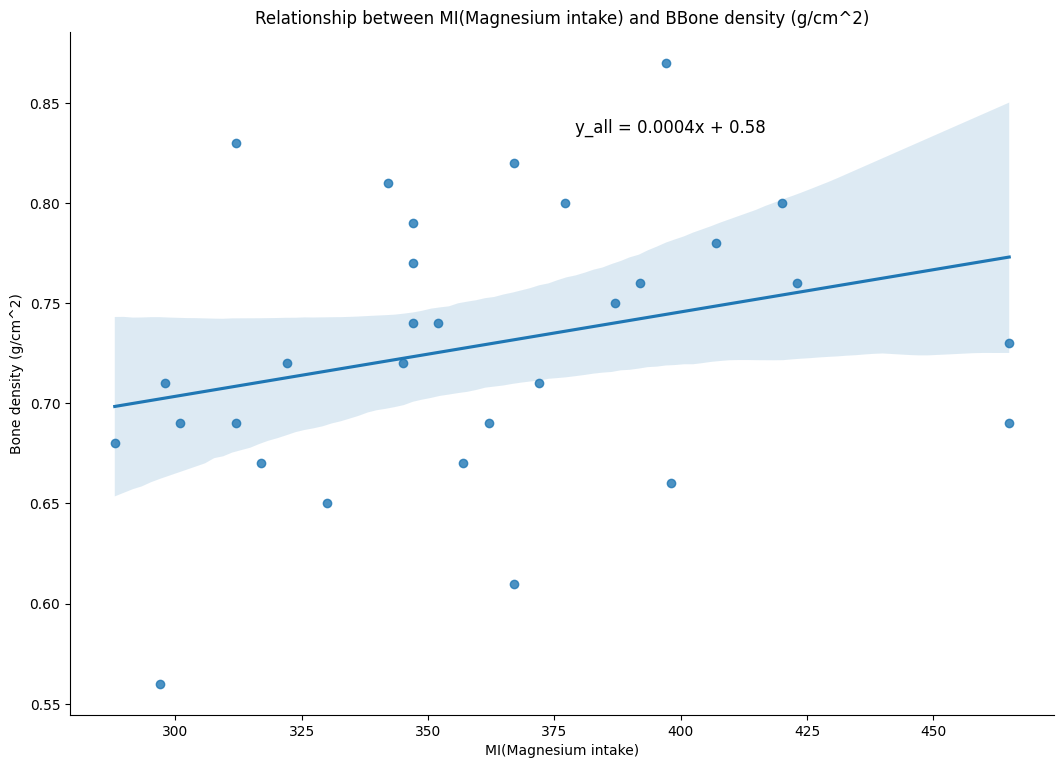

In [16]:
g = sns.lmplot(x = "MI(Magnesium intake)",y = "Bone density (g/cm^2)", data = df_o)
g.figure.set_size_inches(12, 8)

plt.title("Relationship between MI(Magnesium intake) and BBone density (g/cm^2)")

#Calculate the parameters of the fitted linear correlation function by the method of coefficients to be determined
slope, intercept = g.ax.lines[0].get_data()
k = (intercept[-1]-intercept[0])/(slope[-1]-slope[0])
b =  intercept[0] - (slope[0]*k)

#Draw a fig and present the data on the graph
x = g.ax.get_xlim()
y = g.ax.get_ylim()
g.ax.text(x[0]+100 , y[1]-0.05, f'y_all = {round(k,4)}x + {round(b,2)}', fontsize=12)


### Bivariate correlation analysis of magnesium intake and calcium density.

#### Basic hypothesis:
#####  If there is a positive correlation between the two variables, it suggests that the threshold set based on the 350mg distinction may be wrong. In the case of other threshold divisions, there exists a reasonable threshold for magnesium to make an increase in BMD.
#####  If there is no positive correlation between the two variables, it means that magnesium really has no effect on the increase and decrease of bone density.

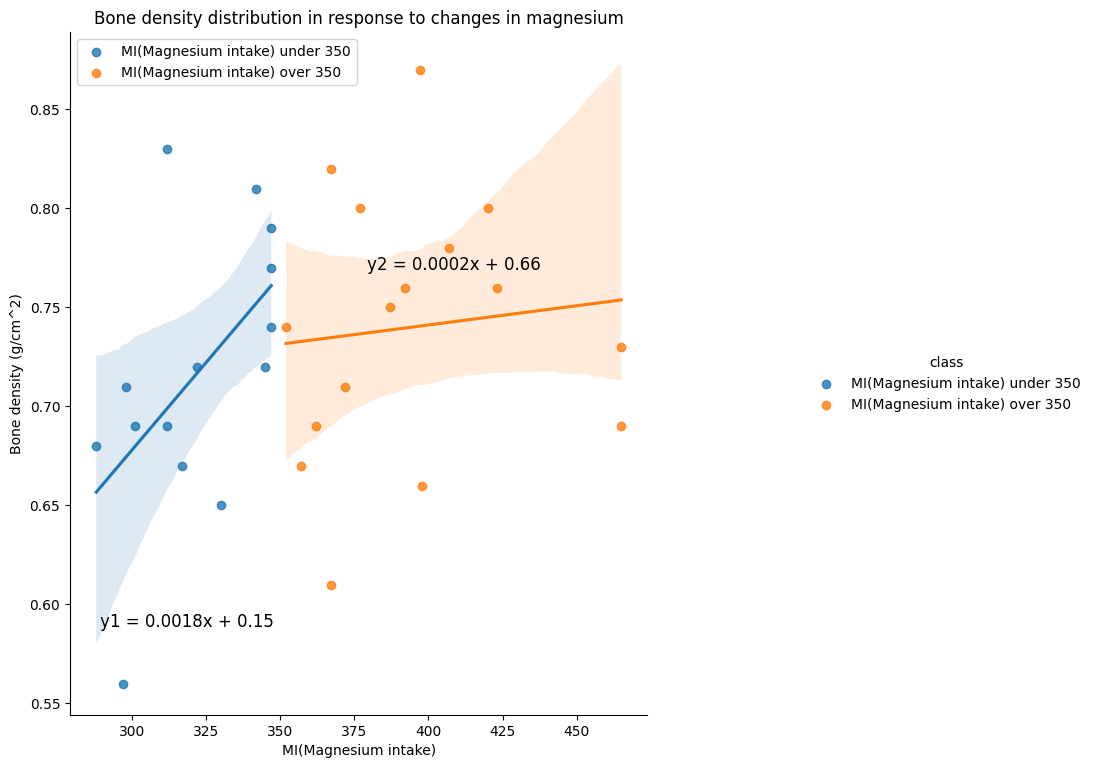

In [17]:

g = sns.lmplot(y = "Bone density (g/cm^2)",x = "MI(Magnesium intake)", data = df_o,hue= 'class')
g.figure.set_size_inches(12, 8)

plt.title("Bone density distribution in response to changes in magnesium")

#计算拟合线性相关函数的参数，通过待定系数法
slope1, intercept1 = g.ax.lines[0].get_data()
slope2, intercept2 = g.ax.lines[1].get_data()
k1 = (intercept1[-1]-intercept1[0])/(slope1[-1]-slope1[0])
k2 = (intercept2[-1]-intercept2[0])/(slope2[-1]-slope2[0])
b1 =  intercept1[0] - (slope1[0]*k1)
b2 =  intercept2[0] - (slope2[0]*k2)

#画图，并将数据展示在图上
x = g.ax.get_xlim()
y = g.ax.get_ylim()
g.ax.text(x[0]+10 , y[1]-0.3, f'y1 = {round(k1,4)}x + {round(b1,2)}', fontsize=12)
g.ax.text(x[0]+100 , y[1]-0.12, f'y2 = {round(k2,4)}x + {round(b2,2)}', fontsize=12)
plt.legend()

Text(0.05, 0.9, 'p_value = 0.3554')

<Figure size 1000x1000 with 0 Axes>

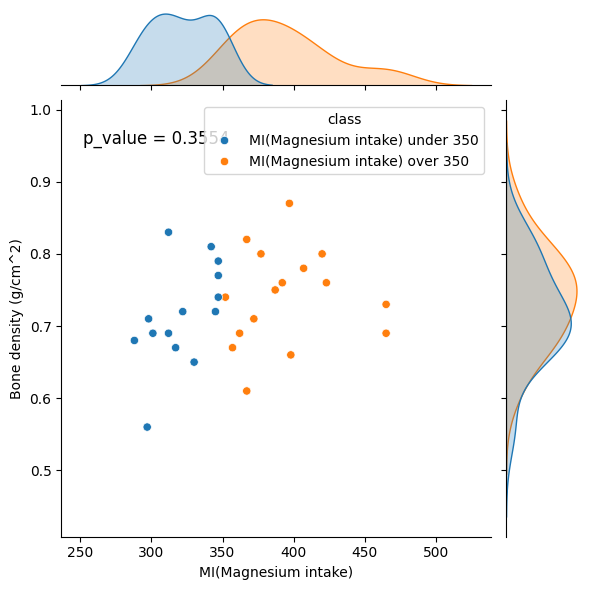

In [18]:
plt.figure(figsize=(10, 10))

sns.jointplot(data = df_o,x = 'MI(Magnesium intake)', y = 'Bone density (g/cm^2)', hue="class")
t,p = stats.ttest_ind(D1,D2)

plt.text(0.05, 0.9, f'p_value = {p:.4f}', transform=plt.gca().transAxes, fontsize=12)

#### As a result, it was found that magnesium exhibited some degree of positive correlation within a limited number of data points, and so in order to evaluate the correlation, it would be appropriate at this point to observe whether there is a difference in the fit coefficients based on the assumption of a threshold of 350


## Discussion of results

The conclusion found that there is some positive correlation between magnesium intake and bone mineral density, and if I go a step further, assuming that the amount of data is large enough, is it possible that the assumptions of our initial question are not quite right? There may be other thresholds at which magnesium intake plays a role in bone mineral density. Other current studies have also shown that the effect of magnesium supplementation on the prevention and treatment of osteoporosis has not been extensively and thoroughly investigated even in zoological experiments. According to Rosanoff A CM et al. study[1] , the incidence and relative risk of fracture is increased with an increase in magnesium intake >333.8/(mg-d-1) and in acute high dose magnesium states, it leads to bone damage and bone loss. It has also been shown that long-term magnesium supplementation of 0.5g/(kg-d-1) below the optimal amount is beneficial to bone tissue, while long-term overdose of magnesium supplementation of 5g/(kg-d-1) has a detrimental effect on bone tissue[2][3]. So further tests were conducted.

### Changing the thresholds, it was hypothesized that there were three phases of magnesium intake on BMD, and that there were cycles of intake with significant effects and negative feedback effects.

In [19]:
sample11=[]
data11 =[]
sample12=[]
data12 =[]
sample13=[]
data13 =[]
label_3 = []
ID =[]

for i in df.iloc[2:32, 1]:
    if df.iloc[i + 1, 2] <= 315:
        sample11.append(df.iloc[i + 1, 2])
        data11.append(df.iloc[i + 1, 3])
        label_3.append('MI(Magnesium intake) under 315')
        ID.append('patient')
    elif df.iloc[i + 1, 2] <= 360:
        sample12.append(df.iloc[i + 1, 2])
        data12.append(df.iloc[i + 1, 3])
        label_3.append('MI(Magnesium intake) between 315 and 360')
        ID.append('patient')
    else:
        sample13.append(df.iloc[i + 1, 2])
        data13.append(df.iloc[i + 1, 3])
        label_3.append('MI(Magnesium intake) over 360')
        ID.append('patient')

In [20]:
data_3 = {
    "MI(Magnesium intake)": sample_all,
    "Bone density (g/cm^2)": data_all,
    "class": label_3
}

df_o3= pd.DataFrame(data_3)
df_o3['ID'] = pd.Series(ID)
display(df_o3)

,MI(Magnesium intake),Bone density (g/cm^2),class,ID
0,342,0.81,MI(Magnesium intake) between 315 and 360,patient
1,352,0.74,MI(Magnesium intake) between 315 and 360,patient
2,347,0.77,MI(Magnesium intake) between 315 and 360,patient
3,362,0.69,MI(Magnesium intake) over 360,patient
4,367,0.61,MI(Magnesium intake) over 360,patient
5,347,0.79,MI(Magnesium intake) between 315 and 360,patient
6,347,0.74,MI(Magnesium intake) between 315 and 360,patient
7,377,0.80,MI(Magnesium intake) over 360,patient
8,367,0.82,MI(Magnesium intake) over 360,patient
9,357,0.67,MI(Magnesium intake) between 315 and 360,patient


The correction coefficient for pairwise comparisons between the three groups should below: 0.016666666666666666


Text(0.4, 0.95, 'p1&3_value = 0.1702')

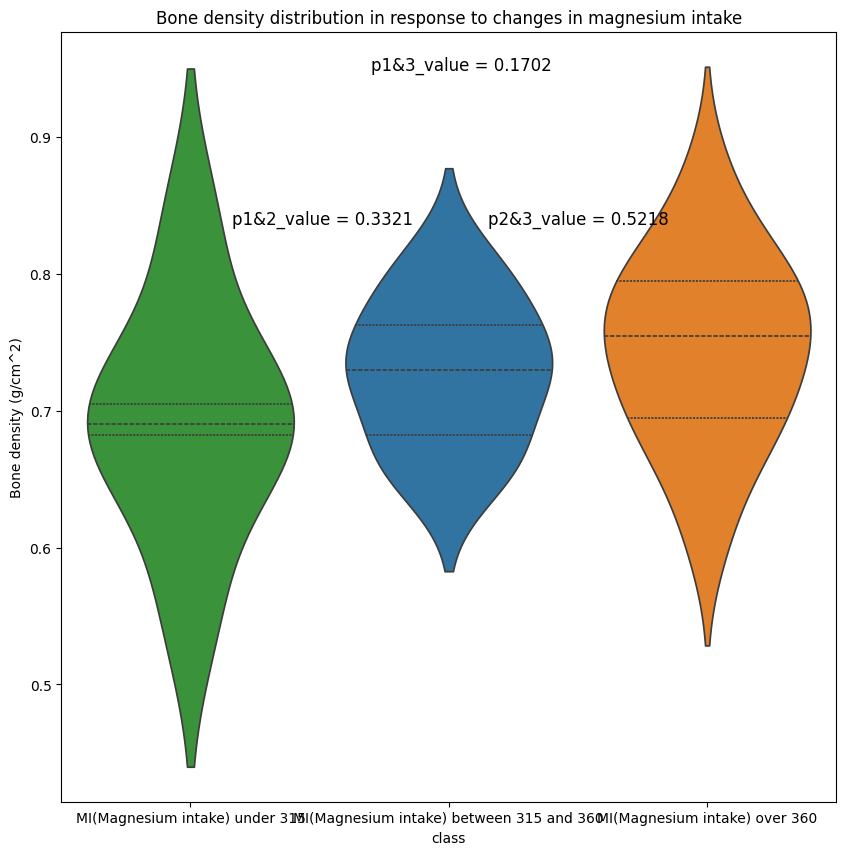

In [21]:
D_11 = df_o3[df_o3['class']=='MI(Magnesium intake) under 315']
D_12 = df_o3[df_o3['class']=='MI(Magnesium intake) between 315 and 360']
D_13 = df_o3[df_o3['class']=='MI(Magnesium intake) over 360']

plt.figure(figsize=(10, 10))
plt.title("Bone density distribution in response to changes in magnesium intake")

sns.violinplot(data=df_o3, x="class", y="Bone density (g/cm^2)", hue="class", inner="quart",order=["MI(Magnesium intake) under 315", "MI(Magnesium intake) between 315 and 360", "MI(Magnesium intake) over 360"])


#The correction coefficients for pairwise comparisons between the three groups.
alpha = 0.05/3
print('The correction coefficient for pairwise comparisons between the three groups should below:',alpha)


t12,p12 = stats.ttest_ind(D_11['Bone density (g/cm^2)'],D_12['Bone density (g/cm^2)'])
plt.text(0.22, 0.75, f'p1&2_value = {p12:.4f}', transform=plt.gca().transAxes, fontsize=12)

t23,p23 = stats.ttest_ind(D_12['Bone density (g/cm^2)'],D_13['Bone density (g/cm^2)'])
plt.text(0.55, 0.75, f'p2&3_value = {p23:.4f}', transform=plt.gca().transAxes, fontsize=12)

t13,p13 = stats.ttest_ind(D_11['Bone density (g/cm^2)'],D_13['Bone density (g/cm^2)'])
plt.text(0.40, 0.95, f'p1&3_value = {p13:.4f}', transform=plt.gca().transAxes, fontsize=12)

###  It was found that under the assumption of changing the threshold, significance results were still not possible due to the small sample size (after taking into account the FDR correction for significance of the 3 stages for comparison (p>0.017)).

In [22]:
from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(D_11['Bone density (g/cm^2)'], D_12['Bone density (g/cm^2)'],D_13['Bone density (g/cm^2)'])

# Display the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 1.2179037312833152
P-value: 0.3115913859012818


### Also using ANOVA, found that under the assumption of changing the threshold, significance results were still not possible due to the small sample size (after taking into account the FDR correction for significance of the 3 phases for comparison (p>0.017)).

### Perform a phased correlation coefficient analysis

Text(399.15, 0.7850920720426667, 'y3 = 0.0x + 0.73')

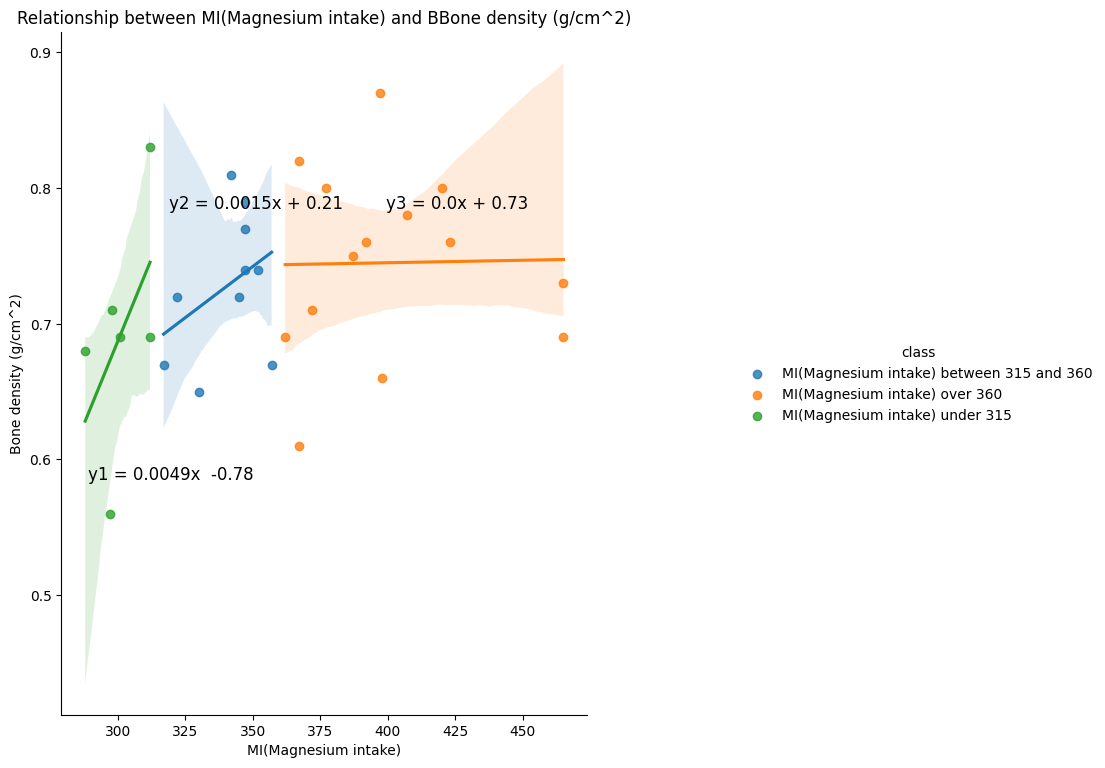

In [23]:
g = sns.lmplot(y = "Bone density (g/cm^2)",x = "MI(Magnesium intake)", data = df_o3,hue= 'class')
g.figure.set_size_inches(12, 8)

plt.title("Relationship between MI(Magnesium intake) and BBone density (g/cm^2)")


slope1, intercept1 = g.ax.lines[2].get_data()
slope2, intercept2 = g.ax.lines[0].get_data()
slope3, intercept3 = g.ax.lines[1].get_data()

k1 = (intercept1[-1]-intercept1[0])/(slope1[-1]-slope1[0])
k2 = (intercept2[-1]-intercept2[0])/(slope2[-1]-slope2[0])
k3 = (intercept3[-1]-intercept3[0])/(slope3[-1]-slope3[0])

b1 =  intercept1[0] - (slope1[0]*k1)
b2 =  intercept2[0] - (slope2[0]*k2)
b3 =  intercept3[0] - (slope3[0]*k3)

x = g.ax.get_xlim()
y = g.ax.get_ylim()
g.ax.text(x[0]+10 , y[1]-0.33, f'y1 = {round(k1,4)}x  {round(b1,2)}', fontsize=12)
g.ax.text(x[0]+40 , y[1]-0.13, f'y2 = {round(k2,4)}x + {round(b2,2)}', fontsize=12)
g.ax.text(x[0]+120 , y[1]-0.13, f'y3 = {round(k3,4)}x + {round(b3,2)}', fontsize=12)


<Axes: title={'center': 'Relationship between MI(Magnesium intake) and BBone density (g/cm^2)'}, xlabel='MI(Magnesium intake)', ylabel='Bone density (g/cm^2)'>

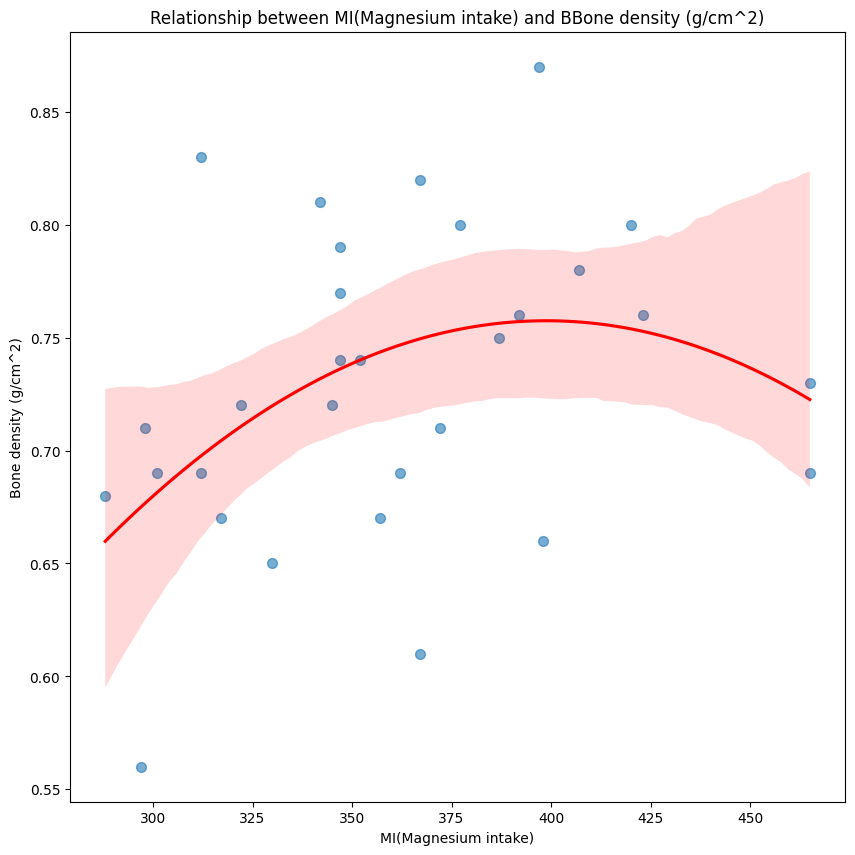

In [24]:
plt.figure(figsize=(10, 10))
plt.title("Relationship between MI(Magnesium intake) and BBone density (g/cm^2)")

sns.regplot(data=df_o3,y = "Bone density (g/cm^2)",x = "MI(Magnesium intake)", order=2, scatter_kws={"s": 50, "alpha": 0.6}, line_kws={"color": "red"})

GG

<Figure size 1000x1000 with 0 Axes>

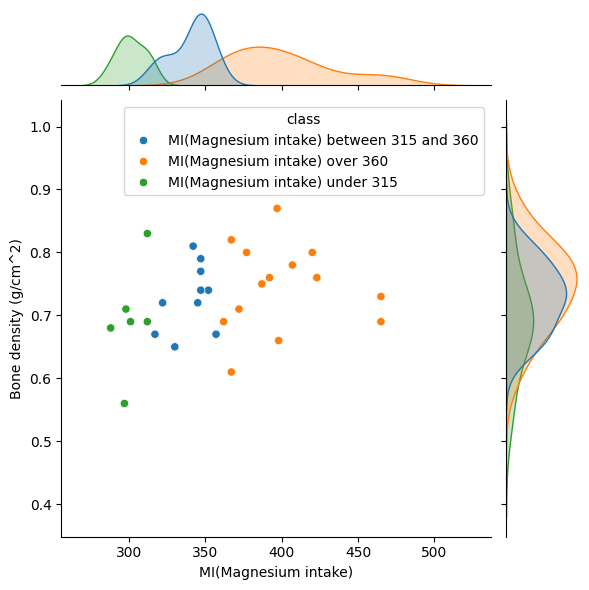

In [25]:
plt.figure(figsize=(10, 10))

sns.jointplot(data = df_o3,x = 'MI(Magnesium intake)', y = 'Bone density (g/cm^2)', hue="class")

### Proposed new design

First, because the data sample is too small, the results of hypothesis testing become more sensitive and more difficult to obtain results with significant differences, so more data need to be refined and sampled. For example, recruiting more subjects for long-term follow-up. In more detail, the data should also be considered for a more detailed multivariate analysis based on the question of whether magnesium intake affects BMD, e.g., taking into account factors such as Sex, age, and live space.
This would allow for a controlled model of multivariate effects for more detailed analysis. 
Long-term follow-up is also important, as the cumulative effect of magnesium over time may show a different trend of effect at the same intake, which is important for the phased regulation of the intake of such elements, and is also more relevant for scientific research [4][5][6].
Finally, the goal of nutrition is to assess with reasonable precision the effects of the intake of the corresponding elements on health such as bone density. Therefore, the ultimate question is how to determine the threshold of significant effects. It may be that it may be more important to study the mechanism of how magnesium intake affects bone density from the available statistical analysis findings than the fact that increased intake increases bone density, while helping us to determine the most reasonable range of intake for a patient based on other factors such as age.


## Reference

[1] Leidi M. Nitric oxide mediates low magnesium inhibition of osteoblast-like cell proliferation[J]. J Nutr Biochem, 2012,23(10): 1224-1229.

[2] Rosanoff A CM. Weaver RK. Suboptimal magnesium status in the United States: are the health consequences underestimated?[J]. Nutr Rev, 2012,70(3): 153-164.

[3] Abed EC, Martineau RM. Role of melastatin transient receptor potential 7 channels in the osteoblastic differentiation of murine MC3T3 cells[J]. Calcif Tissue Int, 2011,88(3): 246-253.

[4] Lopez-Gonzalez B. Association between magn-esium-deficient status and anthropometric and clinical-nutritional parameters in posmenopausal women[J]. Nutr Hosp, 2014,29(3): 658-664.

[5] Iafisco M. Biomimetic magnesium-carbonate-apatite nanocrystals endowed with strontium ions as anti-osteoporotic trigger[J]. Mater Sci Eng C Mater Biol Appl, 2014,35: 212-219.

[6] Nielsen FH. Reported zinc, but not copper, intakes influence whole-body bone density, mineral content and T score responses to zinc and copper supplementation in healthy postmenopausal women[J]. Br J Nutr, 2011,106(12): 1872-1879.